This code uses XGboost to analyze the importance of different features

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance

data = pd.read_csv('density_data.csv')    # Data Location
x = data[['energy_density', 'size','speed']]
x.columns=['Energy density', 'Geometry', 'Laser scanning speed']
y = data['density']
y.columns=['Density']


[19:52:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




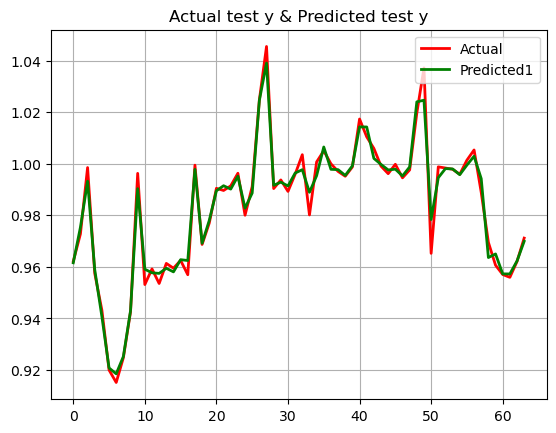

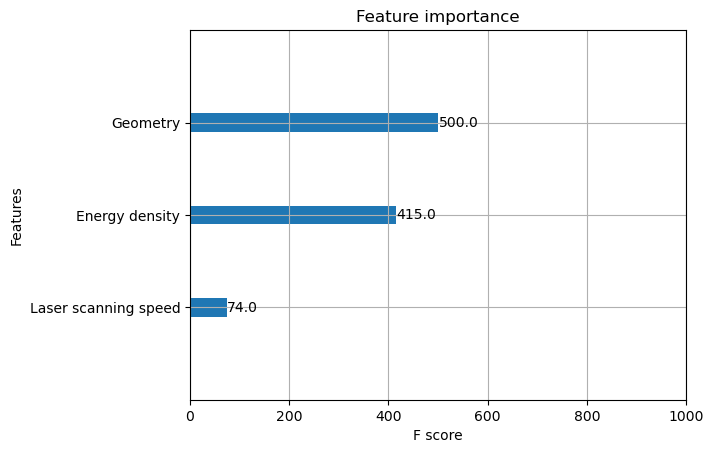

In [7]:
xgb_model = XGBRegressor(n_estimators=200, 
                     learning_rate=0.1, 
                     max_depth=6, 
                     silent=True, 
                     objective='reg:gamma')
xgb_model.fit(x, y) 
ans = xgb_model.predict(x)
r2_score(y, ans)
t = np.arange(len(x))
plt.plot(t, y, 'r-', linewidth=2, label='Actual')
plt.plot(t, ans, 'g-', linewidth=2, label='Predicted1')
plt.title('Actual test y & Predicted test y')
plt.legend(loc='upper right')
plt.grid()
plt.show()
# Show important features
plot_importance(xgb_model,importance_type='weight',xlim =(0,1000))
plt.show()
